<a href="https://colab.research.google.com/github/fathanick/Machine-Learning-Deep-Learning-Fundamental/blob/master/Sentiment_Analysis_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://i.imgur.com/XoRDxQJ.png" align = "center">

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
dataset = pd.read_csv("/content/drive/Shared drives/Pusat Studi Data Science/PYTHON CODE/IMDB Dataset.csv")

In [0]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [0]:
features = dataset['review']
labels = dataset['sentiment']

In [0]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

###Naive Bayes

In [0]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predictions = mnb.predict(X_test)

In [0]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Accuracy: {0:.4f}".format(accuracy_score(y_test, predictions)))

Confusion Matrix:
[[4215  820]
 [ 677 4288]]
              precision    recall  f1-score   support

    negative       0.86      0.84      0.85      5035
    positive       0.84      0.86      0.85      4965

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Accuracy: 0.8503


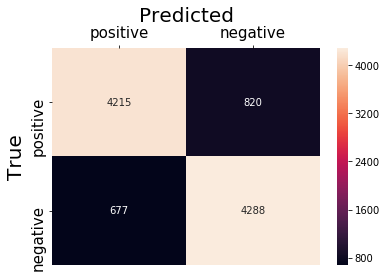

In [0]:
matrix = confusion_matrix(y_test, predictions)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['positive', 'negative'], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['positive', 'negative'], fontsize = 15)
plt.show()

###LinearSVC

In [0]:
svc = LinearSVC()
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)

In [0]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Accuracy: {0:.4f}".format(accuracy_score(y_test, predictions)))

Confusion Matrix:
[[4364  671]
 [ 574 4391]]
              precision    recall  f1-score   support

    negative       0.88      0.87      0.88      5035
    positive       0.87      0.88      0.88      4965

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy: 0.8755


In [0]:
matrix = confusion_matrix(y_test, predictions)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['positive', 'negative'], fontsize = 15)
#ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['positive', 'negative'], fontsize = 15)
plt.show()

NameError: ignored

###Logistic Regression

In [0]:
logit = LogisticRegression(C=0.2, dual=True)
logit.fit(X_train, y_train)
predictions = logit.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Accuracy: {0:.4f}".format(accuracy_score(y_test, predictions)))

Confusion Matrix:
[[4322  713]
 [ 576 4389]]
              precision    recall  f1-score   support

    negative       0.88      0.86      0.87      5035
    positive       0.86      0.88      0.87      4965

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Accuracy: 0.8711


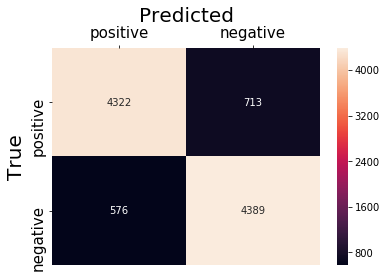

In [0]:
matrix = confusion_matrix(y_test, predictions)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['positive', 'negative'], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['positive', 'negative'], fontsize = 15)
plt.show()